In [55]:
import pandas as pd
import numpy as np

data = pd.read_csv("age.csv")
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
data["Death year"] = data["Death year"].astype("int")
data.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865,homicide,56.0
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832,natural causes,42.0
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926,natural causes,86.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45828 entries, 0 to 1222958
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 45828 non-null  object 
 1   Name               45828 non-null  object 
 2   Short description  45828 non-null  object 
 3   Gender             45828 non-null  object 
 4   Country            45828 non-null  object 
 5   Occupation         45828 non-null  object 
 6   Birth year         45828 non-null  int64  
 7   Death year         45828 non-null  int32  
 8   Manner of death    45828 non-null  object 
 9   Age of death       45828 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 3.7+ MB


In [57]:
data["Country"].value_counts()

United States of America                                                                                  16957
France                                                                                                     2555
United Kingdom                                                                                             2546
Germany                                                                                                    1713
Canada                                                                                                     1295
                                                                                                          ...  
Grand Duchy of Hesse; Russian Empire                                                                          1
France; Russian Soviet Federative Socialist Republic; Russian Empire                                          1
Grand Duchy of Vladimir; Principality of Ryazan; Principality of Dorogobuzh; Principality of Vyshgorod  

In [58]:
data.describe()

,Birth year,Death year,Age of death
count,45828.000000,45828.000000,45828.000000
mean,1891.823492,1951.331697,59.508205
std,155.957373,158.544508,18.245002
min,-1200.000000,-1145.000000,11.000000
25%,1890.000000,1944.000000,46.000000
50%,1923.000000,1990.000000,61.000000
75%,1942.000000,2008.000000,74.000000
max,2002.000000,2020.000000,122.000000


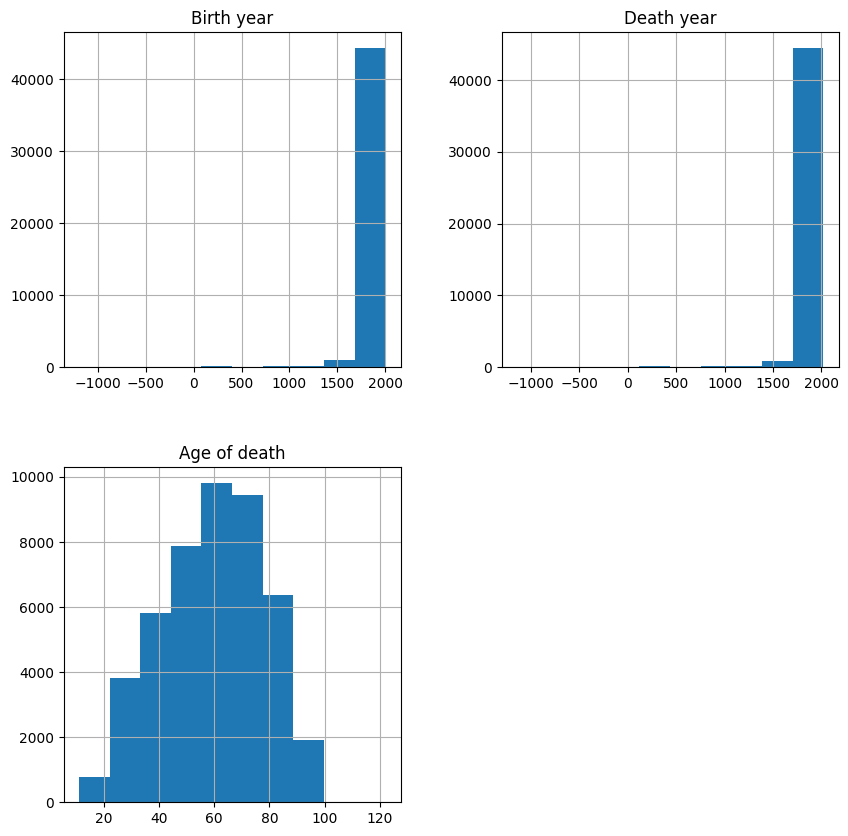

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(10,10))
plt.show()

In [60]:
np.random.seed(13)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [61]:
train_set, test_set = split_train_test(data, 0.3)
len(train_set)

32080

In [62]:
len(test_set)

13748

In [63]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [64]:
data_with_id = data.reset_index()
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [65]:
train_set, test_set

(         index         Id                      Name  \
 0            0        Q23         George Washington   
 1            1        Q42             Douglas Adams   
 4            7       Q296              Claude Monet   
 5           10       Q303             Elvis Presley   
 6           13       Q346        Louis IX of France   
 ...        ...        ...                       ...   
 45822  1215398  Q75336010  George Dewey Sanford Jr.   
 45823  1215502  Q75349931               John Saxton   
 45824  1217919  Q75717629            Antonín Gruncl   
 45825  1221308  Q76161186             Sara Champion   
 45826  1222916  Q76857201          Dolores Millanes   
 
                                     Short description  Gender  \
 0      1st president of the United States (1732–1799)    Male   
 1                         English writer and humorist    Male   
 4            French impressionist painter (1840-1926)    Male   
 5               American singer and actor (1935–1977)    Male

In [71]:
data = data.reset_index()
data_with_id["id"] = data["Birth year"] * 1000 + data["Death year"]
train_set, test_set = split_train_test_by_id(data_with_id, 0.3, "id")
train_set, test_set

(         index         Id                       Name  \
 0            0        Q23          George Washington   
 1            1        Q42              Douglas Adams   
 2            2        Q91            Abraham Lincoln   
 3            5       Q260  Jean-François Champollion   
 4            7       Q296               Claude Monet   
 ...        ...        ...                        ...   
 45823  1215502  Q75349931                John Saxton   
 45824  1217919  Q75717629             Antonín Gruncl   
 45825  1221308  Q76161186              Sara Champion   
 45826  1222916  Q76857201           Dolores Millanes   
 45827  1222958  Q76995470       David Hillhouse Buel   
 
                                      Short description  Gender  \
 0       1st president of the United States (1732–1799)    Male   
 1                          English writer and humorist    Male   
 2      16th president of the United States (1809-1865)    Male   
 3                             French classica

In [73]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3, random_state=13)
train_set, test_set

(       level_0   index         Id                          Name  \
 3847      3847   33769    Q157250                   Harry Kroto   
 14276    14276   99587    Q726919               Walter Connolly   
 31230    31230  437678   Q5112408              Christopher Gist   
 42034    42034  758397  Q14866898                 Michael Silka   
 2711      2711   19149     Q95680          Kurt Gustav Wilckens   
 ...        ...     ...        ...                           ...   
 153        153     368      Q5031  Elder Paisios of Mount Athos   
 22260    22260  246476   Q2318223                Randall Bewley   
 33634    33634  487982   Q5606999          Gregory Joujon-Roche   
 32842    32842  465580   Q5461857                  Florin Mugur   
 33106    33106  472055   Q5497694   Frederick Erastus Humphreys   
 
                  Short description Gender                   Country  \
 3847               British chemist   Male            United Kingdom   
 14276   American actor (1887-1940)   

<AxesSubplot:>

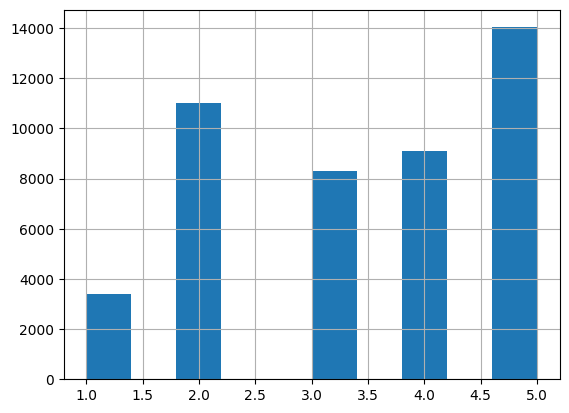

In [74]:

data["age_cat"] = pd.cut(data["Age of death"],bins=[1, 30, 50, 60, 70, np.inf],labels=[1, 2, 3, 4, 5])
data["age_cat"].hist()

In [75]:
data["age_cat"].value_counts()

5    14031
2    11005
4     9113
3     8294
1     3385
Name: age_cat, dtype: int64

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit #83

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
for train_index, test_index in split.split(data, data["age_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
strat_test_set["age_cat"].value_counts() / len(strat_test_set)

5    0.306131
2    0.240127
4    0.198887
3    0.180995
1    0.073860
Name: age_cat, dtype: float64

In [77]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

In [78]:
data = strat_train_set.copy()

<AxesSubplot:xlabel='Age of death', ylabel='Death year'>

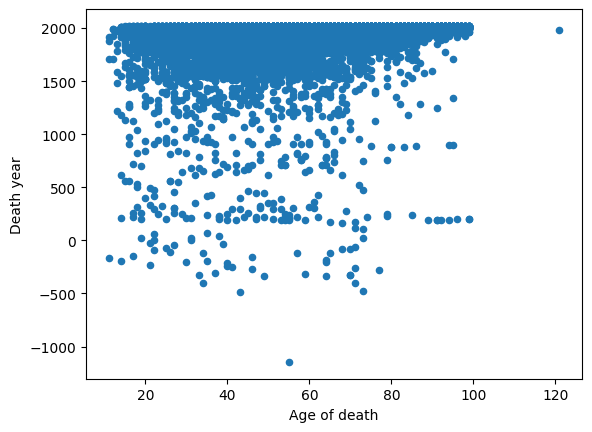

In [86]:
data.plot(kind="scatter", x="Age of death", y="Death year")

<AxesSubplot:xlabel='Age of death', ylabel='Death year'>

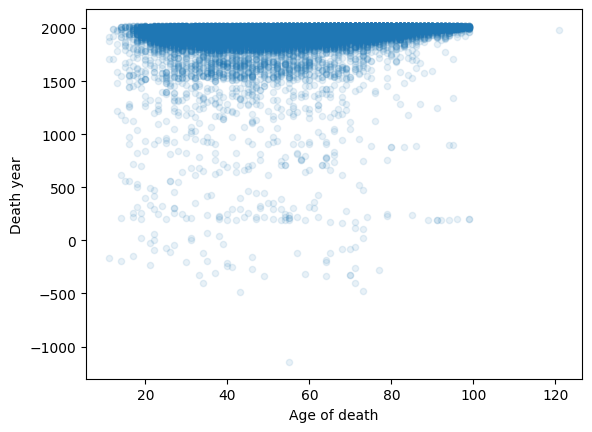

In [87]:
data.plot(kind="scatter", x="Age of death", y="Death year", alpha=0.1)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not median_age_value

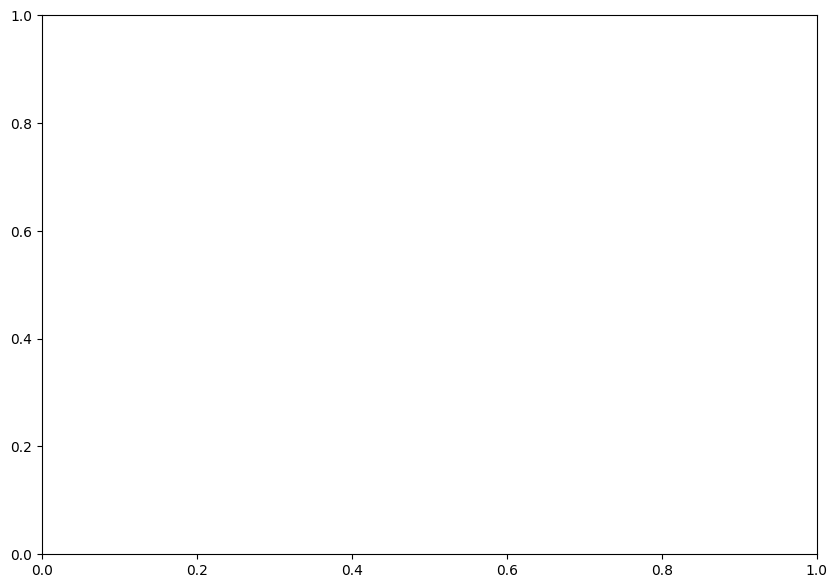

In [91]:
data.plot(kind="scatter", x="Age of death", y="Death year", alpha=0.4, s=data["Birth year"], label="Birth year", figsize=(10,7), c="median_age_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()